# Counterparty credit risk

We want to quantify CCR to find out how costly it is to buy a financial contract from a risky counterparty

## Definition of a problem
Today ($t_0=0$) we buy from a counterparty a call (or put) option with maturity ($T=$)1 year and strike ($K=$)100.

- The option is written on an underlying stock $S$ with value $S(0)=85$.
- the stock $S$ pays a dividend $d=2\%$ per year and has a volatility of $\sigma=25\%$ per year
- the interest rate on the market is $r=5\%$ per year

In [239]:
T = 1 #maturity
K = 100 #strike
S0 = 85 #initial stock
d = .02 #dividend
sigma = .25 #volatility
r = .05 #interest rate
days = 365 #days in a year

## Stock simulation

We assume that the stock $S(t)$ evolves as a geometric brownian motion:
$$ S(t+\Delta t) = S(t)\cdot\exp\left[\left(r-d-\sigma^2/2\right)\Delta t + \sigma\sqrt{\Delta t}\cdot Z\right]$$ 
where $Z$ is a standard normally distributed random variable

In [240]:
import pandas as pd
import numpy as np

from IPython.display import clear_output
from numpy.random import randn

In [241]:
N = 10000 #number of paths

dt = T/days
paths = pd.DataFrame()
#paths['t'] = np.linspace(0,T,T*days+1)

for k in range(N):
    #initialize new path
    S = S0
    path = [S]
    
    #simulate path
    for l in range(T*days):
        Z = randn()
        S = S*np.exp((r-d-(sigma**2)/2)*dt+sigma*np.sqrt(dt)*Z)
        path.append(S)
        
    #add the path to the dataframe
    paths["path"+str(k)] = path
    print("Path",k+1,"simulated")
    clear_output(wait=True)

print("Done")

Done


In [242]:
paths.head()

,path0,path1,path2,path3,path4,path5,path6,path7,path8,path9,...,path9990,path9991,path9992,path9993,path9994,path9995,path9996,path9997,path9998,path9999
0,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
1,84.313498,84.057831,85.799799,86.461957,86.774104,83.336056,85.183688,84.470312,86.116386,84.149439,...,84.012399,83.358449,87.194245,83.889707,83.796674,83.846415,86.556133,84.786125,86.932972,86.632488
2,84.706453,84.238603,85.903849,85.342682,86.027739,83.324017,86.395235,85.542439,85.473508,84.501682,...,83.924451,83.052368,86.957197,85.063828,82.144562,82.958993,86.420296,87.705977,87.950619,87.167079
3,84.539099,84.388336,86.289365,84.419636,85.815387,83.995582,86.691493,83.889769,84.438993,83.677307,...,83.725343,83.282083,86.886422,85.166963,81.699737,84.172109,88.200774,87.341645,89.315219,85.840352
4,85.269316,83.283768,87.098520,83.707255,84.614468,83.492720,87.535384,82.058497,84.966125,83.330814,...,84.486997,84.584878,87.750274,83.358108,82.043307,85.281434,89.663861,88.007059,90.462427,86.174569


In [243]:
paths.tail()

,path0,path1,path2,path3,path4,path5,path6,path7,path8,path9,...,path9990,path9991,path9992,path9993,path9994,path9995,path9996,path9997,path9998,path9999
361,64.079999,58.511214,57.875242,142.988462,68.473420,79.374920,57.626453,128.507878,90.675880,81.381533,...,89.309726,99.822924,96.230088,57.421887,73.910773,72.068488,68.154138,67.374634,100.746580,78.345908
362,65.168663,58.735176,57.826978,140.425398,68.342518,80.498597,57.323144,129.680740,92.126941,80.785131,...,88.419358,99.877073,95.565959,57.841159,75.889673,72.036062,68.382279,68.002818,100.791197,76.472854
363,66.399321,58.928187,58.365838,143.260466,67.840439,79.105138,58.282516,131.245449,90.208292,81.712722,...,88.084464,99.407696,94.372088,58.699305,75.825151,71.583179,69.465034,68.213845,100.849782,77.872596
364,67.570132,58.501269,57.866221,143.990783,65.692365,78.621673,58.726548,133.348948,89.515097,80.601898,...,89.166058,100.000149,93.278912,57.830463,75.365103,70.977421,71.195343,69.029354,99.272448,77.811400
365,67.183523,59.106112,58.286204,140.269485,65.257215,79.656652,58.288062,134.581924,88.501374,81.157475,...,90.645485,100.392336,93.320967,57.879760,74.439515,69.538842,71.157580,69.338398,98.514558,78.260249


### Plotting some paths

In [244]:
import matplotlib.pyplot as plt

In [247]:
#find paths with extremal values at ends
Min = 1000
Min_path = ''
Max = 0
Max_path =''
Mean_path = ''
Mean_dist = 1000
for path in paths.keys():
    if path=='t':
        continue
    val = paths.loc[T*days,path]
    if val>Max:
        Max = val
        Max_path = path
    if val<Min:
        Min = val
        Min_path = path
    if abs(val-S0)<Mean_dist:
        Mean_path = path

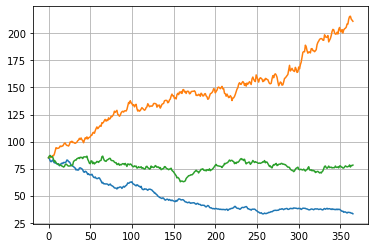

In [248]:
#plot extremal paths
Min_plot = paths[Min_path]
plt.plot(Min_plot)
Max_plot = paths[Max_path]
plt.plot(Max_plot)
Mean_plot = paths[Mean_path]
plt.plot(Mean_plot)
plt.grid(True)

plt.show()

## Pricing under scenario with Black-Scholes formula

A **call option** is a financial contract where the buyer has the right - but not the obligation - to buy the stock $S$ on a future date $T$ at a contractually fixed price $K$. The date $T$ is called *maturity*, while the fixed price is called *strike*.

If $S(T)>K$ then we *exercise* the option: we buy the ctock for price $K$, while on the market its value is $S(T)$, hence we gain $S(T)-K$.

If $S(T)\leq K$ then we do not exercise the option: we can buy the stock on the market for a price which is lower than the strike $K$, hence the value of the option is 0.

Hence, the price of the call option at maturity is $V(T) = \max(S(T)-K,0)$.

A **put option** is a financial contract where the buyer has the right - but not the obligation - to sell the stock $S$ on a future date $T$ at a contractually fixed price $K$. The date $T$ is called *maturity*, while the fixed price is called *strike*.

If $S(T)<K$ then we *exercise* the option: we sell the ctock for price $K$, while on the market its value is $S(T)$, hence we gain $K-S(T)$.

If $S(T)\geq K$ then we do not exercise the option: we can buy the stock on the market for a price which is lower than the strike $K$, hence the value of the option is 0.

Hence, the price of the call option at maturity is $V(T) = \max(K-S(T),0)$.

### Black-Scholes formulas
If we assume that $S(t)$ evolves as a geometric brownian motion then the price of a call and put option with maturity $T$ and strike $K$ are given by the Black-Scholes formulas:

$$ Call(t) = e^{-d(T-t)}\cdot S(t)\cdot N(d_1)-e^{-r(T-t)}\cdot K\cdot N(d_2) $$

$$ Put(t) = -e^{-d(T-t)}\cdot S(t)\cdot N(d_1)-e^{-r(T-t)}\cdot K\cdot N(d_2) $$

where $N$ is the cummulative function of a standard normal distribution and $d_1$, $d_2$ are given by

$$ d_1 = \frac{\ln\left(\frac{S(t)}{K}\right)+\left(r-d+\sigma^2/2\right)(T-t)}{\sigma\sqrt{T-t}}$$

$$ d_2 = d_1 - \sigma\sqrt{T-t}.$$

Setting $\omega=1$ for a call option and $\omega=-1$ for a put option, formulas above condense to

$$ V(t,\omega) = \omega\left[e^{-d(T-t)}\cdot S(t)\cdot N(\omega d_1)-e^{-r(T-t)}\cdot K\cdot N(\omega d_2)\right].$$

In [249]:
from scipy.stats import norm

In [250]:
w = 1 #call or put

Values = pd.DataFrame()

t = np.linspace(0,T,T*days+1)
for path, S in paths.iteritems():
    a = np.log(S/K) + (r-d+(sigma**2)/2)*(T-t)
    b = sigma*np.sqrt(T-t)
    d1 = a/b
    d2 = d1 - sigma*np.sqrt(T-t)
    V = w*(np.exp(-d*(T-t))*S*norm.cdf(w*d1)-np.exp(-r*(T-t))*K*norm.cdf(w*d2))
    Values[path] = V
    print("Path",path[4:],"values calculated")
    clear_output(wait=True)   
    
print("Done")

Done


In [251]:
Values.head()

,path0,path1,path2,path3,path4,path5,path6,path7,path8,path9,...,path9990,path9991,path9992,path9993,path9994,path9995,path9996,path9997,path9998,path9999
0,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,...,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206,4.182206
1,3.943611,3.861355,4.443712,4.678621,4.791959,3.635068,4.231855,3.994608,4.555090,3.890702,...,3.846854,3.641958,4.947145,3.807865,3.778470,3.794168,4.712639,4.098574,4.850284,4.740332
2,4.060039,3.907456,4.467478,4.273491,4.511029,3.619828,4.641760,4.341928,4.318235,3.992800,...,3.807073,3.537098,4.846142,4.179090,3.269522,3.508944,4.650759,5.126890,5.220704,4.923864
3,3.992950,3.943869,4.591044,3.954027,4.423917,3.817811,4.735853,3.784294,3.960317,3.717565,...,3.732586,3.595450,4.807047,4.201498,3.132575,3.874147,5.304138,4.975850,5.748919,4.432624
4,4.223725,3.584431,4.872102,3.715201,4.005507,3.648578,5.035452,3.222925,4.121785,3.598811,...,3.963876,3.995818,5.117008,3.607169,3.218600,4.227832,5.878363,5.215508,6.214737,4.537432


In [252]:
Values.tail()

,path0,path1,path2,path3,path4,path5,path6,path7,path8,path9,...,path9990,path9991,path9992,path9993,path9994,path9995,path9996,path9997,path9998,path9999
361,5.729559e-66,2.099904e-94,3.571872e-98,43.011905,1.643538e-48,1.565362e-19,1.112670e-99,28.534494,5.760012e-05,5.615175e-16,...,4.328878e-06,0.972224,8.312066e-02,6.221739e-101,8.080890e-32,6.286399e-37,1.191102e-49,1.629578e-52,1.482978,1.524725e-21
362,7.817556e-81,3.243945e-123,2.358931e-130,40.443403,1.792623e-64,1.222157e-22,1.881089e-134,29.700511,8.260776e-05,5.589651e-22,...,1.105702e-08,0.855087,1.930767e-02,3.066334e-130,3.983344e-35,1.407994e-48,2.765895e-64,4.248574e-66,1.373081,2.426918e-33
363,7.139786e-110,4.088374e-181,1.278868e-187,43.272160,5.726514e-99,6.573233e-38,1.342009e-188,31.258461,4.033883e-09,8.279802e-29,...,9.191821e-13,0.483596,4.447550e-04,9.673892e-184,8.925436e-52,3.035875e-74,1.264010e-87,2.831724e-96,1.253425,8.670700e-43
364,7.734304e-199,0.000000e+00,0.000000e+00,43.996591,6.309346e-228,6.605059e-77,0.000000e+00,33.355340,1.934917e-18,2.012838e-62,...,1.382700e-19,0.526181,1.220080e-08,0.000000e+00,4.019111e-105,7.042690e-153,3.228645e-150,3.988198e-178,0.237653,2.126948e-83
365,0.000000e+00,0.000000e+00,0.000000e+00,40.269485,0.000000e+00,0.000000e+00,0.000000e+00,34.581924,0.000000e+00,0.000000e+00,...,0.000000e+00,0.392336,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00


### Plotting some values

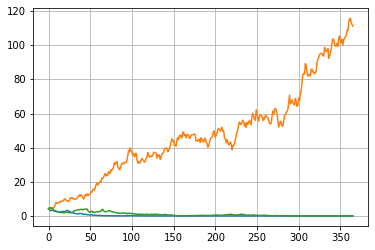

In [254]:
Min_values = Values[Min_path]
Max_values = Values[Max_path]
Mean_values = Values[Mean_path]

plt.plot(Min_values)
plt.plot(Max_values)
plt.plot(Mean_values)
plt.grid(True)
plt.show()

## Aggregation of exposures and their mitigation
The **positive exposure** is defined as
$$ PE = \max(V,0) $$
If $V<0$ then we do not have exposure to the counterparty and hence we do not have counterparty risk

The **expected positive exposure** is defined as an average of positive exposures. The exposure profile tells us how much we would lose on an average on a time step $t$ if the counterparty decided not to fulfill its contractual obligations.

In [255]:
PEs = pd.DataFrame()

for path, V in Values.iteritems():
    PE = (V + abs(V))/2
    PEs[path] = PE
    
EPEs = []
for t, row in PEs.iterrows():
    EPE = np.mean(row)
    EPEs.append(EPE)

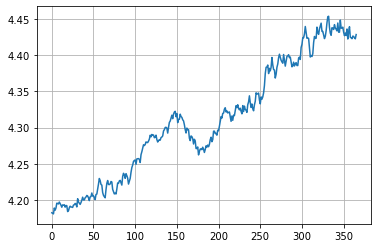

In [256]:
plt.plot(EPEs)
plt.grid(True)
plt.show()

## Collateral

If the expected exposure is too high, we can sign with the counterparty a *collateral* agreement.
In a collateral agreement, we specify the maximum amount of exposure that we are willing to
accept. Such amount is called **threshold**.

If the exposure exceeds the threshold $Th$, the counterparty is obliged to give us (post) a
certain amount of cash – called *collateral* – so that the exposure reduces to an amount no
bigger than the threshold.
Hence, the amount of collateral - $Coll$ that the counterparty has to post on a time step $t$ and is given by:

$$Coll(t) = \max(V(t)-Th,0).$$

If $V(t) > Th$, the exposure is higher than the threshold, hence the counterparty has to post
$V(t) − Th$ to reduce the exposure down to the threshold.
If $V(t) \leq Th$, the exposure is below the threshold, hence the counterparty does not have to
post collateral.

### The collaterized exposure
If the counterparty posts collateral, the exposure to the counterparty is reduced by the amount of collateral we receive. This new exposure is called *collateralized*.

It is defined as
$$CollPE = \max(V-Coll,0).$$

Note that this quantity is always smaller than the threshold $Th$.

Then we define the *collateralized expected positive exposure$ as an arithmetic average of collateralized positive exposures.

In [263]:
Th = 4.5 #threshold
CollPEs = pd.DataFrame()

for path, V in Values.iteritems():
    U = V-Th
    coll = (U+abs(U))/2
    U = V-coll
    CollPE = (U+abs(U))/2
    CollPEs[path] = CollPE
    
CollEPEs = []
for t, row in CollPEs.iterrows():
    CollEPEs.append(np.mean(row))
    

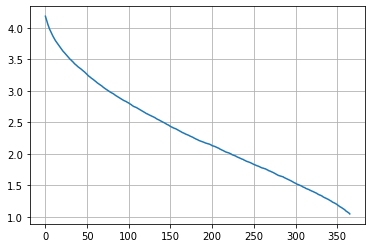

In [264]:
plt.plot(CollEPEs)
plt.grid(True)
plt.show()

## Credit Valuation Adjustment
